In [84]:
!pip install numpy matplotlib pandas tqdm


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
with open("metrics.json", encoding="utf-8") as f:
    data = json.load(f)

In [87]:
df = pd.DataFrame(data)
df.sort_values("duration", ascending=True)

,duration,value,block_size,grid_size,size,runtime,device
56,0.371025,2.532301,NaN,NaN,800000000,OpenBLAS,CPU
36,1.380989,2.666476,512.0,8192.0,800000000,OpenCL Reduction,NVIDIA GeForce RTX 2060
16,1.380996,2.666467,128.0,32768.0,800000000,OpenCL Reduction,NVIDIA GeForce RTX 2060
34,1.381635,2.666472,512.0,2048.0,800000000,OpenCL Reduction,NVIDIA GeForce RTX 2060
26,1.382281,2.666470,256.0,16384.0,800000000,OpenCL Reduction,NVIDIA GeForce RTX 2060
...,...,...,...,...,...,...,...
59,1.588055,2.666471,64.0,2048.0,800000000,CUDA Reduction,GPU
60,1.635128,2.666476,64.0,4096.0,800000000,CUDA Reduction,GPU
58,1.708727,2.666470,64.0,1024.0,800000000,CUDA Reduction,GPU
0,1.770535,2.666470,64.0,1024.0,800000000,OpenCL Reduction,NVIDIA GeForce RTX 2060


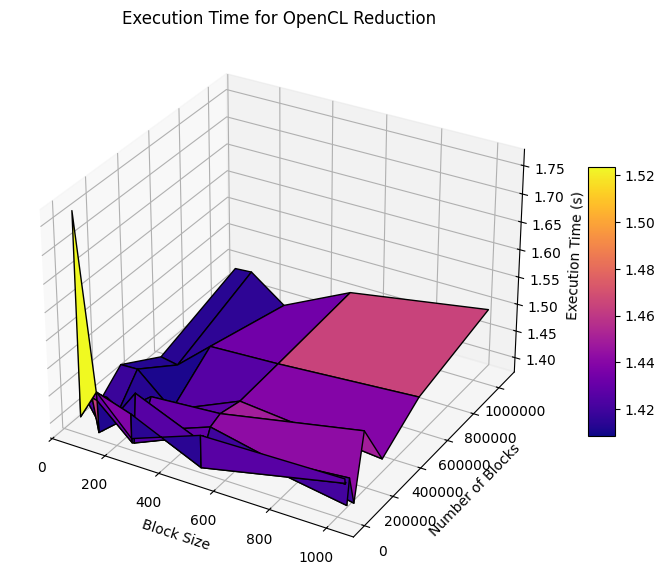

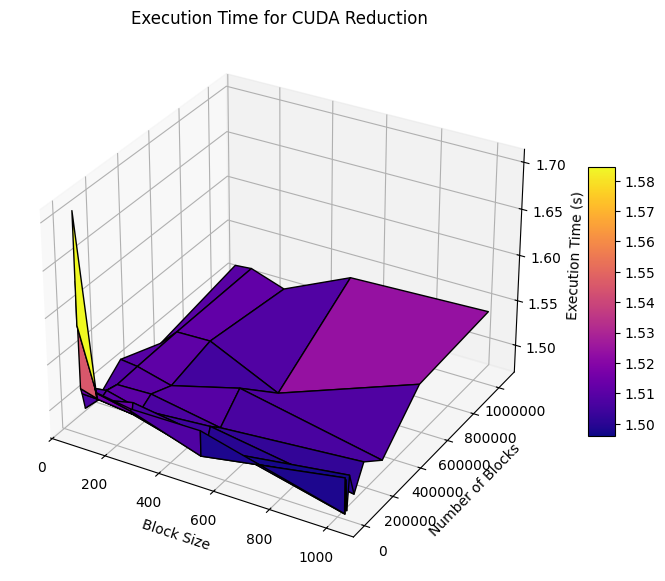

In [88]:
runtimes = df["runtime"].unique()

for target_runtime in ['OpenCL Reduction', 'CUDA Reduction']:
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['grid_size'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['grid_size'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')
    ax.ticklabel_format(style='plain')
    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
